In [1]:
from sklearn.datasets import load_digits
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *

### Load dataset
- digits dataset in scikit-learn
- url: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [2]:
data = load_digits()

In [3]:
X_data = data.images
y_data = data.target

In [4]:
# flatten X_data
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1]*X_data.shape[2])

In [5]:
# shape of data
print(X_data.shape)
print(y_data.shape)    

(1797, 64)
(1797,)


## Model Functional API
- Creating models by Sequential API is easy and simple, but it is impossible to create complicated model structures
- For instance, inception or residual net structure is impossible to implement using Sequential API since they require operations such as layer merging and multiple outputs
- In this case, one could take advantage of Functional API
    - Create model by defining inputs and outputs

### Single input & output
- Model with only single input & output
- Such structure is able to create using Sequential API as well

In [6]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer = Dense(50)(activation_1)
activation_2 = Activation('relu')(hidden_layer)
output_layer = Dense(10, activation = 'softmax')(activation_2)

In [7]:
# creating model
model = Model(inputs = input_layer, outputs = output_layer)

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3250      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 3,760
Trainable params: 3,760
Non-trainable params: 0
_________________________________________________________________


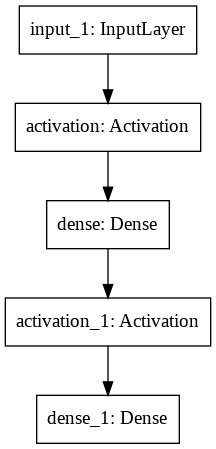

In [9]:
plot_model(model)

### Merging layers
- Sometimes, it is necessary to merge layers (e.g., GoogleNet or ResNet)

#### 1. concatenate
- concatenate() simply merges results of two or more layers
- For instance, assume there are two layers to be concatenated, whose results are
**[x1, x2, ..., xn]** and **[y1, y2, ..., yn]**. Then, concatenated layer would be **[x1, ..., xn, ..., y1, ..., yn]**

In [14]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
concat_layer = concatenate([hidden_layer_1, hidden_layer_2])
print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(concat_layer.shape)

(None, 50)
(None, 50)
(None, 100)


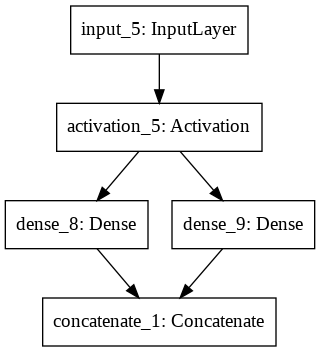

In [15]:
model = Model(inputs = input_layer, outputs = concat_layer)
plot_model(model)

#### 2. add, subtract, multiply, average, maximum
- Such layers perform element-wise operations over all corresponding elements of two or more layers
- Hence, dimensionality of the input layers are preserved

In [16]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
add_layer = add([hidden_layer_1, hidden_layer_2])
print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(add_layer.shape)

(None, 50)
(None, 50)
(None, 50)


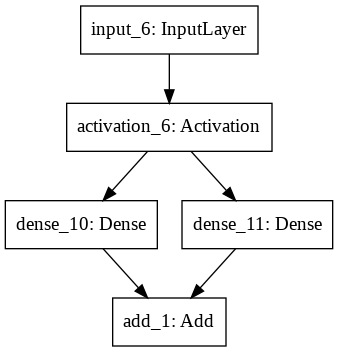

In [17]:
model = Model(inputs = input_layer, outputs = add_layer)
plot_model(model)

#### 3. dot
- dot() performs inner product operation between two layer results
- 'axes' should be defined to perform the operation

In [18]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
dot_layer = dot([hidden_layer_1, hidden_layer_2], axes = -1)
print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(dot_layer.shape)

(None, 50)
(None, 50)
(None, 1)


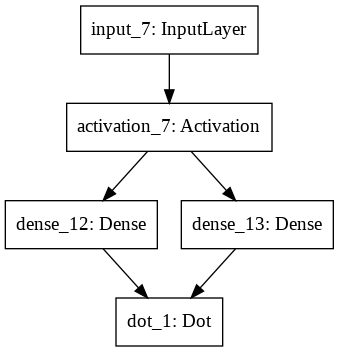

In [19]:
model = Model(inputs = input_layer, outputs = dot_layer)
plot_model(model)